In [2]:
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import PPO
from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import EvalCallback

import os.path
import numpy as np
import pandas as pd
from tensorboardX import SummaryWriter

from lib_for_dqn import lifecycle

N_STEPS = 1_000_000

env = lifecycle.LifecycleEnv()
check_env(env)
model = SAC("MlpPolicy", env, seed = 0, 
            # learning_rate = 0.001,
            tensorboard_log="./runs/")

c:\Users\astragio\rep\Anaconda3\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
c:\Users\astragio\rep\ucl_final_project\reinforcement\lib_for_dqn\lifecycle.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  "percent_consumption": (action_consumption / self.wealth),


In [3]:
#if os.path.isfile("C:\\Users\\AS\\rep\\ucl_final_project\\life_sac.zip"):
model = SAC.load("life_sac_v2", env=env)

eval_env = lifecycle.LifecycleEnv()
eval_callback = EvalCallback(eval_env, best_model_save_path='./logs/best_model', log_path='./logs/results', eval_freq=(N_STEPS/10))

model.learn(total_timesteps=N_STEPS, callback=eval_callback)
model.save("life_sac_v2")

c:\Users\astragio\rep\Anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=0.00 +/- 0.00
Episode length: 1.00 +/- 0.00
New best mean reward!
Eval num_timesteps=20000, episode_reward=4.22 +/- 0.00
Episode length: 11.00 +/- 0.00
New best mean reward!
Eval num_timesteps=30000, episode_reward=4.78 +/- 0.00
Episode length: 10.00 +/- 0.00
New best mean reward!
Eval num_timesteps=40000, episode_reward=4.77 +/- 0.00
Episode length: 9.00 +/- 0.00
Eval num_timesteps=50000, episode_reward=5.04 +/- 0.00
Episode length: 9.00 +/- 0.00
New best mean reward!
Eval num_timesteps=60000, episode_reward=4.81 +/- 0.00
Episode length: 8.00 +/- 0.00


In [ ]:
# watch trained agent
state = env.reset()
done = False
rewards = 0
num_steps = env.terminal_age - env.starting_age + 1
info_df = pd.DataFrame(
    columns=("age", "wealth", "percent_consumption", "consumption", 
    "equity_allocation", "port_return", "reward"))

for step in range(num_steps):
    action, _states = model.predict(state, deterministic=True)
    state, reward, done, info = env.step(action)
    info_df.loc[len(info_df.index)] = info
    rewards += reward
print(rewards)

4.910442531108856


c:\Users\astragio\rep\ucl_final_project\reinforcement\lib_for_dqn\lifecycle.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  "percent_consumption": (action_consumption / self.wealth),
c:\Users\astragio\rep\ucl_final_project\reinforcement\lib_for_dqn\lifecycle.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  "percent_consumption": (action_consumption / self.wealth),
c:\Users\astragio\rep\ucl_final_project\reinforcement\lib_for_dqn\lifecycle.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  "percent_consumption": (action_consumption / self.wealth),
c:\Users\astragio\rep\ucl_final_project\reinforcement\lib_for_dqn\lifecycle.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  "percent_consumption": (action_consumption / self.wealth),
c:\Users\astragio\rep\ucl_final_project\reinforcement\lib_for_dqn\lifecycle.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  "percent_consumption": (action_con

Text(0.5, 1.0, 'Reward')

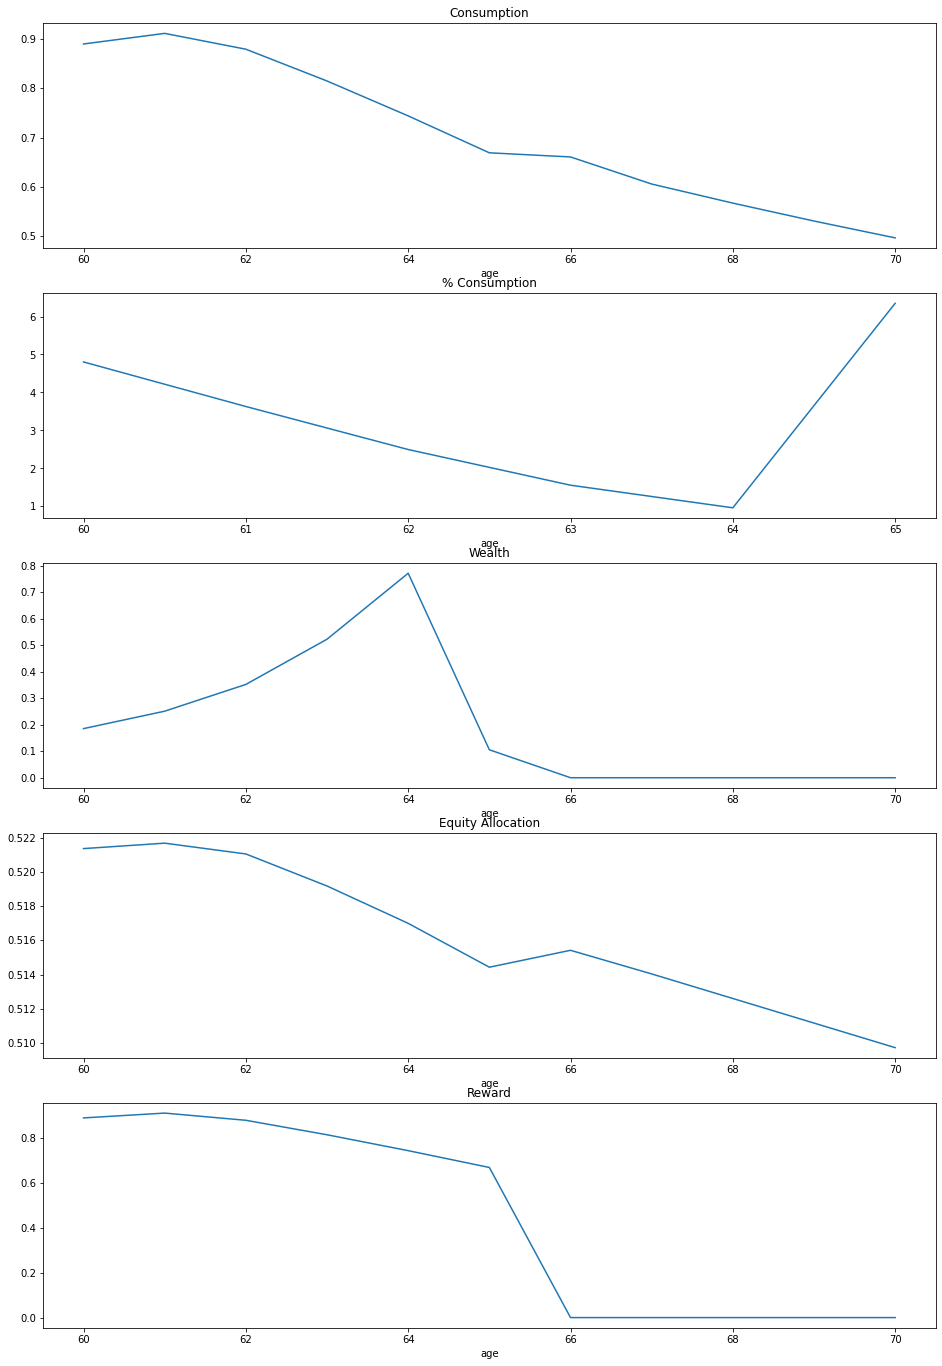

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 5, figsize=(16, 24))
info_df.set_index("age").consumption.rename("consumption").plot(ax = ax[0])
ax[0].set_title("Consumption")
info_df.set_index("age").percent_consumption.rename("percent_consumption").plot(ax = ax[1])
ax[1].set_title("% Consumption")
info_df.set_index("age").wealth.plot(ax = ax[2])
ax[2].set_title("Wealth")
info_df.set_index("age").equity_allocation.plot(ax = ax[3])
ax[3].set_title("Equity Allocation")
info_df.set_index("age").reward.plot(ax = ax[4])
ax[4].set_title("Reward")